<a href="https://colab.research.google.com/github/s-manterola/predicciones-de-ventas-alimenticias/blob/main/Predicciones_de_Ventas_Alimenticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram') 

filename = '/content/drive/MyDrive/Colab Notebooks/Bootcamp/Online Fundamentos/Bases de Datos/sales_predictions.csv'

In [212]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [214]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Eliminar las filas si falta algun dato, elimina la casi la mitad de los datos, es demasiado

In [215]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [216]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [217]:
for id in df['Outlet_Identifier'].unique():
  try:
    df[df['Outlet_Identifier'] == id]['Outlet_Size'].fillna(df[df['Outlet_Identifier'] == id]['Outlet_Size'].mode()[0], inplace = True)
  except:
    pass
df['Outlet_Size'].fillna("Missing", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


El la base de datos no hay valores duplicado. Existen varios datos faltantes, especialmente en la columna Outlet_Size. Al contar los outlets, vemos que solo hay 10 de ellos (solo 10 Outlet_Identifier). Es logico asumir que todos los valores de un Outlet deberian ser iguales, por lo que si falta un dato, se puede tomar de otra fila, en que el Outlet_Identifier sea igual.

El problema es que existen casos en que un Outlet_Identifier no tiene el dato faltante en ninguna parte de la lista. En ese caso se reemplazo el valor Nan por 'Missing'.

In [218]:
df.dropna(how='any', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   object 
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Size                7060 non-null   object 
 9   Outlet_Location_Type       7060 non-null   object 
 10  Outlet_Type                7060 non-null   object 
 11  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 717.0+ KB


Con esto tenemos 7060 filas, de las 8523 iniciales, solo al agregar la categoria 'Missing' en la columna Outlet_Size 

In [219]:
for id in df['Outlet_Location_Type'].unique():
  print(id)

Tier 1
Tier 3
Tier 2


In [220]:
for id in df['Item_Fat_Content'].unique():
  print(id)

Low Fat
Regular
low fat
LF
reg


In [221]:
df.loc[df['Item_Fat_Content']=='low fat','Item_Fat_Content'] = 'Low Fat'
df.loc[df['Item_Fat_Content']=='LF','Item_Fat_Content'] = 'Low Fat'
df.loc[df['Item_Fat_Content']=='reg','Item_Fat_Content'] = 'Regular'

Text(0.5, 1.0, 'Cantidad de locales de venta divididos por tipo')

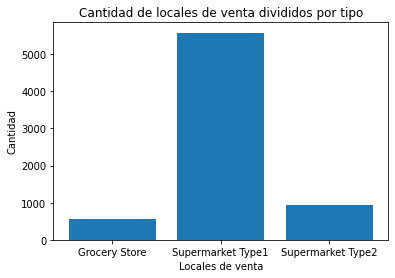

In [222]:
OT = df.groupby('Outlet_Type')['Item_Identifier'].count()

plt.bar(OT.index, OT.values)
plt.xlabel('Locales de venta')
plt.ylabel('Cantidad')
plt.title('Cantidad de locales de venta divididos por tipo')

Se observa que la mayoria de los articulos se vende en supermecados de tipo 1

Text(0.5, 1.0, 'Cantidad de articulos segun su visibilidad')

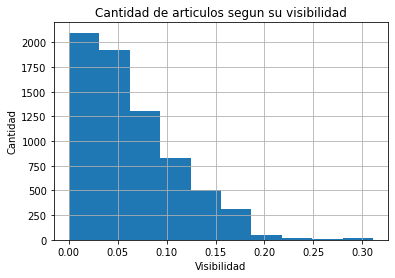

In [223]:
df['Item_Visibility'].hist()

plt.xlabel('Visibilidad')
plt.ylabel('Cantidad')
plt.title('Cantidad de articulos segun su visibilidad')

Se observa que la mayoria de los articulos tiene una visibilidad menor a 0.1, y que la cantidad de articulos decrece mientras aumenta la visibilidad.

Text(0.5, 1.0, 'Cantidad de articulos por contenido de grasa')

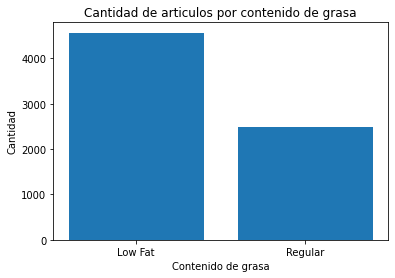

In [224]:
FC = df.groupby('Item_Fat_Content')['Item_Identifier'].count()

plt.bar(FC.index, FC.values)

plt.xlabel('Contenido de grasa')
plt.ylabel('Cantidad')
plt.title('Cantidad de articulos por contenido de grasa')

Se observa que la mayoria de los articulos tienen un bajo contenido de grasa

Text(0.5, 1.0, 'Mapa de calor')

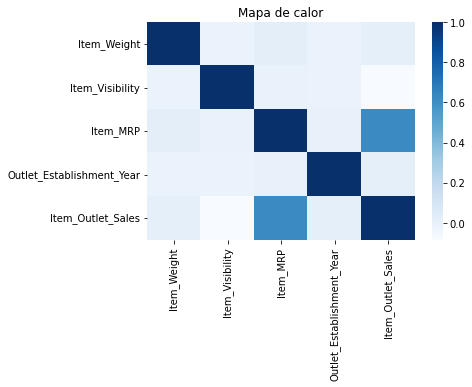

In [225]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues')

plt.title('Mapa de calor')

Se observa que la mayoria de las categorias no tienen una fuerte relacion excepto Item_MRP y Item_Outlet_Sales

In [226]:
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [228]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [229]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [230]:
nominal = ['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type']
ordinal = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']

In [231]:
nom_selector = nominal
ord_selector = ordinal
num_selector = make_column_selector(dtype_include='number')

In [232]:
one_hot = OneHotEncoder(handle_unknown='ignore', sparse=False)
ordinal = OrdinalEncoder()
scaler = StandardScaler()

In [233]:
nom_pipeline = make_pipeline(one_hot)
nom_pipeline

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [234]:
ord_pipeline = make_pipeline(ordinal)
ord_pipeline

Pipeline(steps=[('ordinalencoder', OrdinalEncoder())])

In [235]:
num_pipeline = make_pipeline(scaler)
num_pipeline

Pipeline(steps=[('standardscaler', StandardScaler())])

In [236]:
num_tuple = (num_pipeline, num_selector)
nom_tuple = (nom_pipeline, nom_selector)
ord_tuple = (ord_pipeline, ord_selector)

preprocessor = make_column_transformer(num_tuple, nom_tuple, ord_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa1e5defa10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Identifier', 'Item_Type',
                                  'Outlet_Identifier', 'Outlet_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Item_Fat_Content', 'Outlet_Size',
                                  'Outlet_Location_Type'])])

In [237]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa1e5defa10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Identifier', 'Item_Type',
                                  'Outlet_Identifier', 'Outlet_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Item_Fat_Content', 'Outlet_Size',
                                  'Outlet_Location_Type'])])

In [238]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [241]:
X_train_processed

array([[ 0.88973625, -0.99064597,  1.4001601 , ...,  1.        ,
         2.        ,  1.        ],
       [ 0.85743471,  1.97490651,  0.84991876, ...,  1.        ,
         0.        ,  2.        ],
       [-0.61766898, -0.78894269,  1.95842539, ...,  0.        ,
         3.        ,  0.        ],
       ...,
       [ 1.53576706, -1.32206308, -1.56913136, ...,  0.        ,
         1.        ,  2.        ],
       [ 0.02836184,  0.4003807 ,  0.87711677, ...,  1.        ,
         0.        ,  2.        ],
       [-0.29465357, -1.01357905,  0.49141151, ...,  0.        ,
         2.        ,  1.        ]])

In [242]:
X_test_processed

array([[ 1.48193116, -1.02518789, -0.62511908, ...,  0.        ,
         2.        ,  1.        ],
       [ 1.69727476, -0.88094324,  0.18962081, ...,  0.        ,
         2.        ,  1.        ],
       [-0.91915002, -1.32206308, -0.15495043, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.5882552 ,  0.488631  ,  1.24200146, ...,  0.        ,
         3.        ,  0.        ],
       [-1.65670186, -0.69558957, -1.67057345, ...,  0.        ,
         3.        ,  1.        ],
       [-0.79102058, -0.34544574, -1.45105079, ...,  1.        ,
         1.        ,  2.        ]])